In [1]:
import pandas as pd

In [2]:
path = r"C:\Users\obafe\Downloads\archive (8)\fossil-fuel-co2-emissions-by-nation.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


In [35]:
df.columns


Index(['Year', 'Country', 'Total', 'Solid Fuel', 'Liquid Fuel', 'Gas Fuel',
       'Cement', 'Gas Flaring', 'Per Capita', 'Bunker Fuel'],
      dtype='object')

In [5]:
df.shape

(17232, 10)

In [6]:
df.isnull().sum()

Year                           0
Country                        0
Total                          0
Solid Fuel                     0
Liquid Fuel                    0
Gas Fuel                       0
Cement                         0
Gas Flaring                    0
Per Capita                     0
Bunker fuels (Not in Total)    0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [7]:
df = df.rename(columns={'Bunker fuels (Not in Total)':'Bunker Fuel'})

Text(0, 0.5, 'CO2 emission from bunker fuel (ton)')

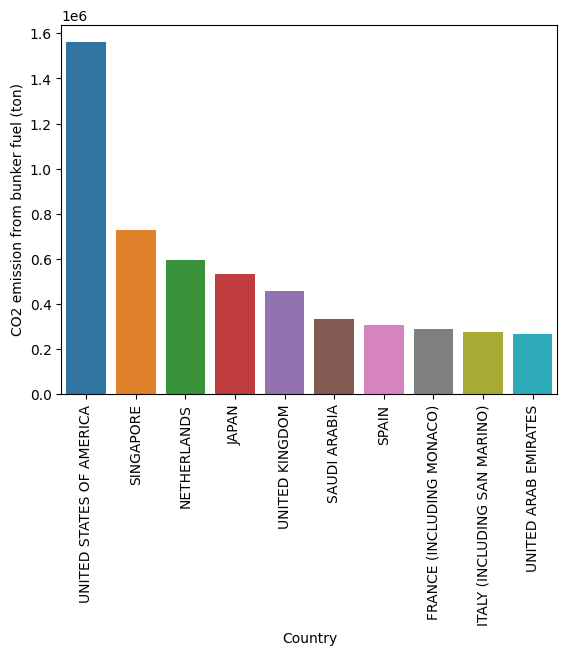

In [30]:
# Let's find out which country has the largest CO2 emission since 1751-2014
import seaborn as sns
import matplotlib.pyplot as plt

co2_bunker_df = df[['Year','Country','Bunker Fuel']]
co2_bunker_df = co2_bunker_df.groupby('Country').sum().sort_values('Bunker Fuel', ascending=False).head(10)
co2_bunker_df = co2_bunker_df.reset_index()
ax1 = sns.barplot(data=co2_bunker_df,x='Country', y='Bunker Fuel')
ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.ylabel('CO2 emission from bunker fuel (ton)')

In [37]:
co2_bunker_df = co2_bunker_df.groupby('Country').sum().sort_values('Bunker Fuel', ascending=False).head(10)
print(co2_bunker_df)

                                Year  Bunker Fuel
Country                                          
UNITED STATES OF AMERICA      410005      1560803
SINGAPORE                     115159       725998
NETHERLANDS                   326170       596990
JAPAN                         128830       531140
UNITED KINGDOM                496980       458581
SAUDI ARABIA                  157960       332248
SPAIN                         355570       304730
FRANCE (INCLUDING MONACO)     395566       289481
ITALY (INCLUDING SAN MARINO)  300235       276055
UNITED ARAB EMIRATES          111244       265451


The country listed above are country with some of the largest shipping traffic. High shipping traffic means more CO2 emission from bunkering process.Spain is in number 7.

Text(0, 0.5, 'Spain CO2 between 1751-2014 (tons)')

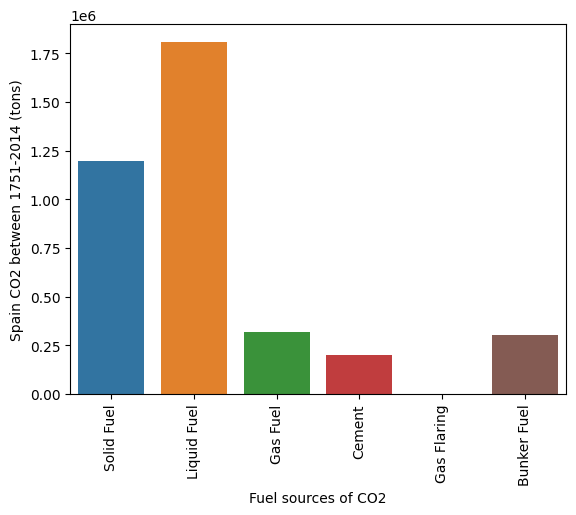

In [16]:
# It is interesting to see that SPaon is one of the major parts for the fule bunkering.
sg_co2_df = df[df.Country == 'SPAIN']
sg_co2_df = sg_co2_df.drop(['Year','Total','Per Capita'], axis=1)
sg_co2_df = sg_co2_df.groupby('Country').sum()
ax2 = sns.barplot(x=sg_co2_df.columns, y=sg_co2_df.values.flatten())
ax2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.xlabel('Fuel sources of CO2')
plt.ylabel('Spain CO2 between 1751-2014 (tons)')

In [38]:
sg_co2_df 

,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Bunker Fuel
Country,,,,,,
SPAIN,1198366,1808072,320659,202067,283,304730


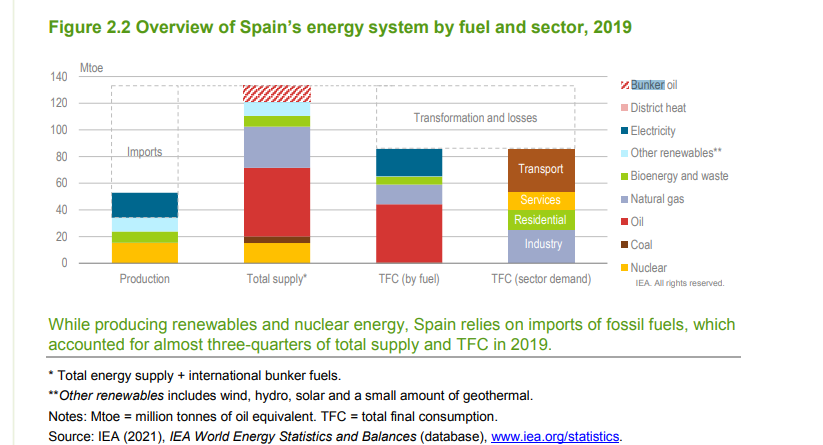

We can discorver from here that although the highest source of CO2 in spain comes from liquid fuel, whereas Spain is not on the top 10 countries from the co2 emissions from Lquid oil, Bunker oil which accounts for less than 0.5 CO2 ton comes from Bunker oil which is less than Liquid oil. This can be erified as Spain is one of the major countries in the world which bunker oil.

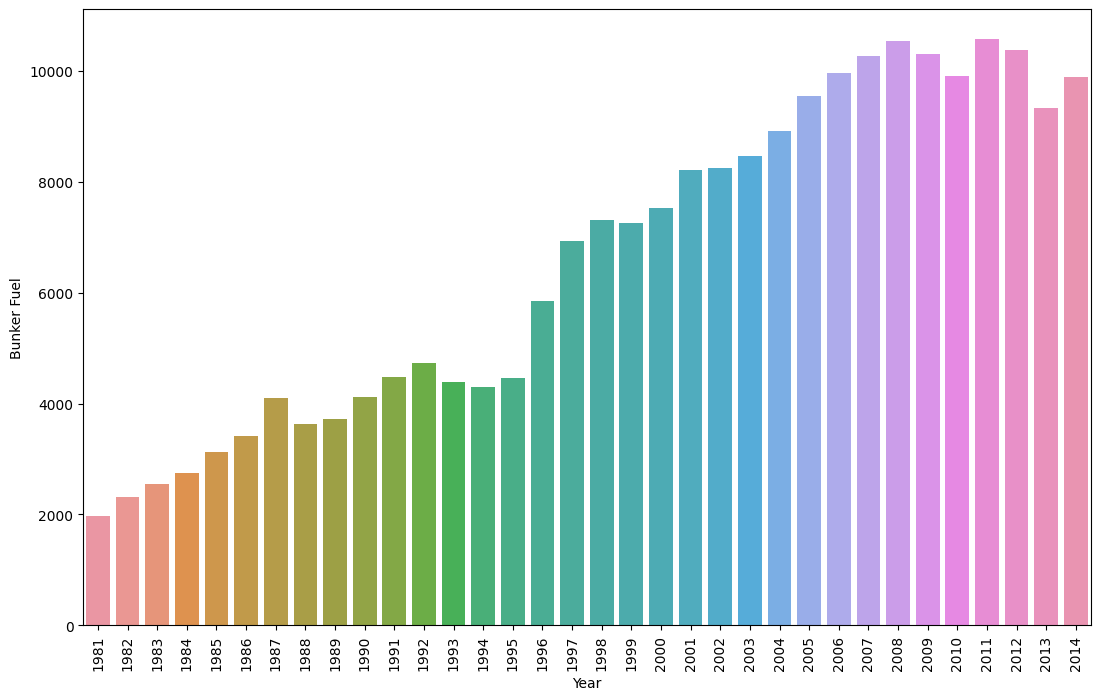

In [32]:
sg_bunker_year_df = df[df.Country == 'SPAIN'][['Year', 'Bunker Fuel']].reset_index().drop('index', axis=1)
plt.figure(figsize=(13, 8))
ax3 = sns.barplot(data=sg_bunker_year_df.loc[sg_bunker_year_df['Year'] > 1980], x='Year', y='Bunker Fuel')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
plt.show()


In [39]:
sg_bunker_year_df

,Year,Bunker Fuel
0,1830,0
1,1831,0
2,1832,0
3,1833,0
4,1834,0
...,...,...
180,2010,9913
181,2011,10585
182,2012,10375
183,2013,9324


We can see an exponential growth in oil bunkering since the 90s

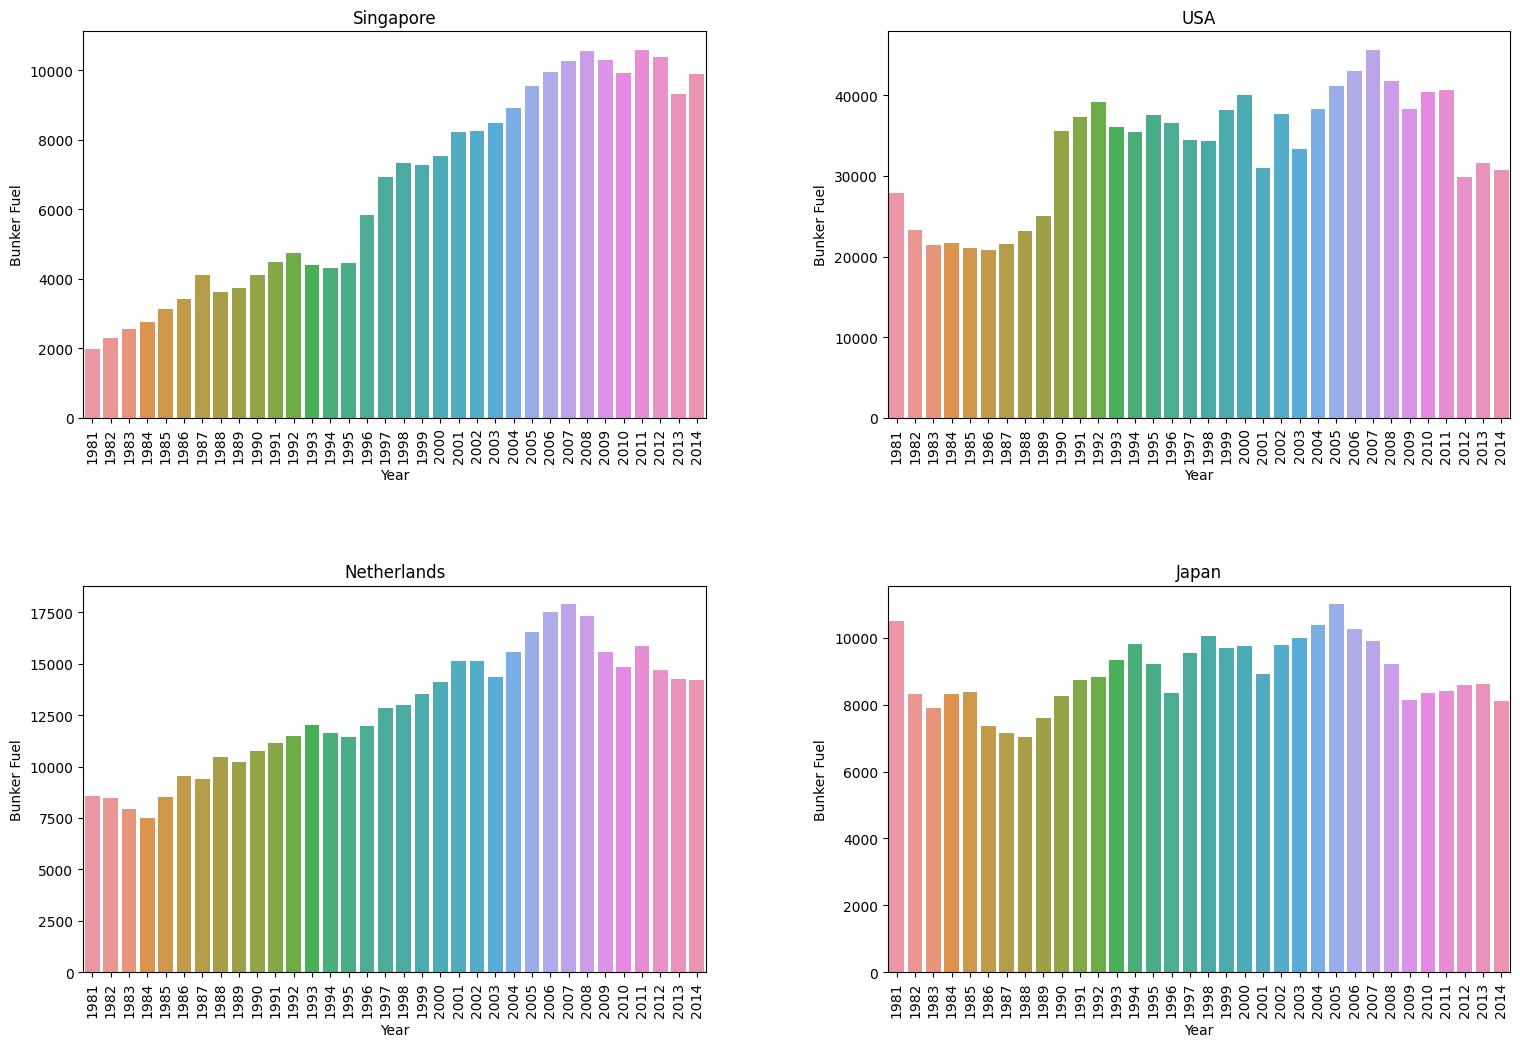

In [34]:
# Let me compare the top 4 countries (USA, Singapore, Netherland, and Japan) whether similar trends are observed
usa_bunker_year_df = df[df.Country == 'UNITED STATES OF AMERICA'][['Year','Bunker Fuel']].reset_index().drop('index',axis=1)
neth_bunker_year_df = df[df.Country == 'NETHERLANDS'][['Year','Bunker Fuel']].reset_index().drop('index',axis=1)
jap_bunker_year_df = df[df.Country == 'JAPAN'][['Year','Bunker Fuel']].reset_index().drop('index',axis=1)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(h_pad=10, w_pad=10)
sns.barplot(data=sg_bunker_year_df.loc[sg_bunker_year_df['Year']>1980], x='Year', y='Bunker Fuel', ax=ax1).set_title("Singapore")
ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
sns.barplot(data=usa_bunker_year_df.loc[usa_bunker_year_df['Year']>1980], x='Year', y='Bunker Fuel', ax=ax2).set_title("USA")
ax2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
sns.barplot(data=neth_bunker_year_df.loc[neth_bunker_year_df['Year']>1980], x='Year', y='Bunker Fuel', ax=ax3).set_title("Netherlands")
ax3 = ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
sns.barplot(data=jap_bunker_year_df.loc[jap_bunker_year_df['Year']>1980], x='Year', y='Bunker Fuel', ax=ax4).set_title("Japan")
ax4 = ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)